In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from planet import opt_th;

In [4]:
from fastai.conv_learner import *

In [7]:
PATH ='data/planet/'
#PATH = 'data/planet/sample'

In [8]:
ls {PATH}

test-jpg/                   test-jpg.tar.7z  train-jpg.tar.7z
test-jpg-additional/        tmp/             train_v2.csv
test-jpg-additional.tar.7z  train-jpg/       train_v2.csv.zip


In [9]:
!wc -l {PATH}/train_v2.csv

40480 data/planet//train_v2.csv


In [10]:
!ls {PATH}/train-jpg|wc -l

40479


In [11]:
!ls {PATH}/test-jpg|wc -l

61191


In [12]:
files = os.listdir(f'{PATH}/train-jpg')[:5]
files

['train_23452.jpg',
 'train_14536.jpg',
 'train_32056.jpg',
 'train_32349.jpg',
 'train_23536.jpg']

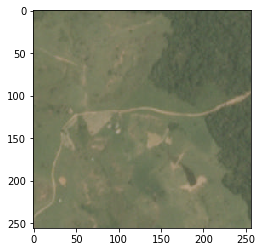

In [13]:
img = plt.imread(f'{PATH}/train-jpg/{files[0]}')
plt.imshow(img);

In [14]:
from planet import f2
metrics=[f2]
f_model = resnet34

In [16]:
label_csv = f'{PATH}/train_v2.csv'
n = len(list(open(label_csv)))-1
val_idxs = get_cv_idxs(n,val_pct=0.1)

In [17]:
def get_data(sz):
    tfms = tfms_from_model(f_model, sz, aug_tfms=transforms_top_down, max_zoom=1.05)
    return ImageClassifierData.from_csv(PATH, 'train-jpg', label_csv,bs=64, tfms=tfms,
                    suffix='.jpg', val_idxs=val_idxs, test_name='test-jpg')

In [18]:
data = get_data(256)

In [20]:
x,y = next(iter(data.val_dl))

In [21]:
y


    1     0     0  ...      0     0     1
    0     0     0  ...      0     0     0
    0     1     0  ...      0     0     1
       ...          ⋱          ...       
    0     0     0  ...      0     0     0
    0     0     0  ...      0     0     0
    0     0     0  ...      0     0     0
[torch.cuda.FloatTensor of size 64x17 (GPU 0)]

In [22]:
list(zip(data.classes, y[0]))

[('agriculture', 1.0),
 ('artisinal_mine', 0.0),
 ('bare_ground', 0.0),
 ('blooming', 0.0),
 ('blow_down', 0.0),
 ('clear', 1.0),
 ('cloudy', 0.0),
 ('conventional_mine', 0.0),
 ('cultivation', 0.0),
 ('habitation', 0.0),
 ('haze', 0.0),
 ('partly_cloudy', 0.0),
 ('primary', 1.0),
 ('road', 0.0),
 ('selective_logging', 0.0),
 ('slash_burn', 0.0),
 ('water', 1.0)]

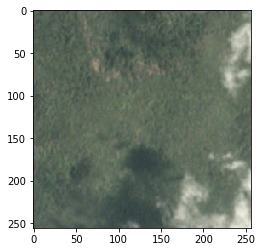

In [23]:
plt.imshow(data.val_ds.denorm(to_np(x))[10]*1.4);

In [24]:
sz=64
data = get_data(sz)

In [25]:
data = data.resize(int(sz*1.3), 'tmp')

In [26]:
learn = ConvLearner.pretrained(f_model, data, metrics=metrics)

epoch      trn_loss   val_loss   f2                          
    0      0.217017   0.322451   0.813555  



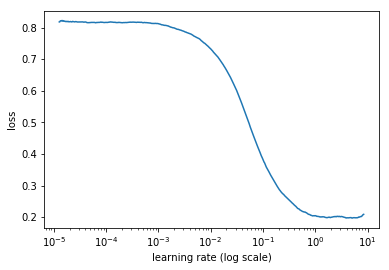

In [27]:
lrf=learn.lr_find()
learn.sched.plot()

In [29]:
lr = 0.2

In [30]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   f2                          
    0      0.14949    0.132018   0.886169  
    1      0.142909   0.126606   0.888372                    
    2      0.136425   0.12502    0.890935                    
    3      0.137774   0.125215   0.890435                    
    4      0.132639   0.122733   0.891759                    
    5      0.131104   0.12125    0.896812                    
    6      0.131378   0.120849   0.894995                    



[array([0.12085]), 0.8949951584544644]

In [31]:
lrs = np.array([lr/9,lr/3,lr])

In [32]:
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   f2                          
    0      0.120098   0.107839   0.910342  
    1      0.113723   0.102038   0.914855                    
    2      0.10712    0.098066   0.919463                    
    3      0.113226   0.102601   0.913712                    
    4      0.103742   0.098824   0.917798                    
    5      0.10123    0.095638   0.920772                     
    6      0.098448   0.094814   0.921441                     



[array([0.09481]), 0.9214414314947431]

In [34]:
learn.save(f'{sz}')

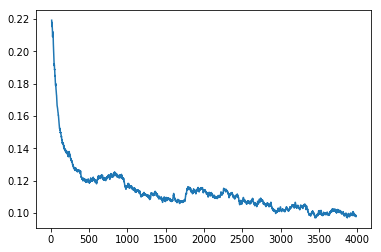

In [35]:
learn.sched.plot_loss()

In [36]:
sz=128

In [37]:
learn.set_data(get_data(sz))
learn.freeze()
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   f2                           
    0      0.097106   0.094097   0.92002   
    1      0.09699    0.094509   0.919457                     
    2      0.095904   0.092806   0.922013                     
    3      0.098373   0.094233   0.920174                     
    4      0.094979   0.092113   0.922883                     
    5      0.097236   0.09225    0.922111                     
    6      0.094419   0.091903   0.923022                     



[array([0.0919]), 0.9230218719404856]

In [38]:
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)
learn.save(f'{sz}')

epoch      trn_loss   val_loss   f2                           
    0      0.09428    0.086742   0.928457  
    1      0.090317   0.086972   0.927773                     
    2      0.089265   0.085609   0.928156                     
    3      0.094784   0.087572   0.926356                     
    4      0.090583   0.085623   0.928481                     
    5      0.083941   0.083734   0.929946                     
    6      0.083851   0.083743   0.929636                     



In [39]:
sz=256

In [40]:
learn.set_data(get_data(sz))
learn.freeze()
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   f2                           
    0      0.091774   0.08754    0.927791  
    1      0.089317   0.087378   0.926486                     
    2      0.088465   0.086753   0.927369                     
    3      0.090498   0.086966   0.927349                     
    4      0.088108   0.085929   0.928745                     
    5      0.088613   0.085879   0.928669                     
    6      0.087333   0.085688   0.928524                     



[array([0.08569]), 0.9285242897204042]

In [41]:
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)
learn.save(f'{sz}')

epoch      trn_loss   val_loss   f2                           
    0      0.086577   0.08183    0.932044  
    1      0.088178   0.082399   0.932393                     
    2      0.083571   0.080299   0.93334                      
    3      0.088672   0.083744   0.930301                     
    4      0.087482   0.083004   0.929252                     
    5      0.080258   0.080166   0.93396                      
    6      0.076257   0.08014    0.933367                     



In [42]:
multi_preds, y = learn.TTA()
preds = np.mean(multi_preds, 0)

In [43]:
f2(preds,y)

0.9323825012878433

In [44]:
threshold=opt_th(preds,y)

In [45]:
threshold

0.23000000000000007

In [46]:
multi_preds_test, y_test = learn.TTA(is_test=True)
preds_test = np.mean(multi_preds_test, 0)

In [47]:
classes=np.array(data.classes)
classes

array(['agriculture', 'artisinal_mine', 'bare_ground', 'blooming', 'blow_down', 'clear', 'cloudy',
       'conventional_mine', 'cultivation', 'habitation', 'haze', 'partly_cloudy', 'primary', 'road',
       'selective_logging', 'slash_burn', 'water'], dtype='<U17')

In [48]:
preds_test.shape

(61191, 17)

In [49]:
data.test_ds.n

61191

In [50]:
res = [" ".join(classes[np.where(pp > 0.5)]) for pp in preds_test] 
test_fnames = [os.path.basename(f).split(".")[0] for f in data.test_ds.fnames]
test_df = pd.DataFrame(res, index=test_fnames, columns=['tags'])

In [56]:
test_df.to_csv(f'{PATH}fastai-planet-understanding-the-amazon-from-space.gz',compression='gzip')

In [57]:
FileLink(f'{PATH}fastai-planet-understanding-the-amazon-from-space.gz')

/home/paperspace/fastai/courses/dl1/data/planet/fastai-planet-understanding-the-amazon-from-space.gz

In [54]:
test_df

,tags
test_25202,agriculture partly_cloudy primary
test_5717,clear cultivation habitation primary
test_40598,agriculture clear primary
file_2096,clear primary
file_19729,partly_cloudy primary
file_423,agriculture cultivation haze primary
file_401,haze primary
test_35442,agriculture clear primary water
file_7286,clear primary
test_22859,primary
